<a href="https://colab.research.google.com/github/Fuenfgeld/DMA2023TeamC/blob/main/Datenbank/EDA_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction 1 (Supervised Learning)
Predicting the number of medications and conditions based on the patients' race and ethnicity.




In [ ]:
# install the newest version 
!pip3 install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


# Importing Libraries

In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import pandas_profiling

<ipython-input-2-e0657a8d3aac>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
# will make plot outputs appear and stored within the notebook.
%matplotlib inline

In [ ]:
from google.colab import drive
# mount drive to access database
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#material_path = "/content/drive/Shareddrives/05_BIDS_Datenmanagement & Archivierung im Umfeld der Forschung/Material"

In [ ]:
# list of datawarehoses
#!ls "/content/drive/Shareddrives/05_BIDS_Datenmanagement & Archivierung im Umfeld der Forschung/Material/DWH_dbs"


# Loading Data


In [ ]:
# type of patient
patient_type = "metebolic_syndrome_disease"

In [ ]:
# datawarehouse path
DB_DWH_PATH = "/content/drive/Shareddrives/TeamC/teamc_dwh.db"
print("Datawarehouse: ", DB_DWH_PATH)
# connect to db
dwh_conn = sqlite3.connect(DB_DWH_PATH)

Datawarehouse:  /content/drive/Shareddrives/TeamC/teamc_dwh.db


In [ ]:
# list of tables in db
if dwh_conn is not None:
  dwh_cursor = dwh_conn.cursor()
  dwh_cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
  print("List of Tables", dwh_cursor.fetchall())


List of Tables [('patients_info',), ('conditions_info',), ('medications_info',), ('med_codes',), ('conditions_codes',)]


In [ ]:
# Read sqlite query results into a pandas DataFrame

# demographic data
df_patients = pd.read_sql_query("SELECT * FROM patients_info", dwh_conn)

# diagnoses data
df_conditions = pd.read_sql_query("select * from conditions_info", dwh_conn)

# medications data
df_medications = pd.read_sql_query("SELECT * FROM medications_info", dwh_conn)

# medications codes data
df_med_codes = pd.read_sql_query("SELECT * FROM med_codes", dwh_conn)

# conditions codes data
df_conditions_codes = pd.read_sql_query("SELECT * FROM conditions_codes", dwh_conn)


In [ ]:
# close db connection
dwh_conn.close()


# Exploratory Data Analysis (EDA)


In [ ]:
ProfileReport(df_patients)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_patients.head()

,Id,BIRTHDATE,DEATHDATE,RACE,ETHNICITY
0,5e96bd7f-bdc3-7787-110f-ba2dfb89948b,1982-09-20,None,white,nonhispanic
1,19a257c0-1425-cb43-c92b-60be60a62e4b,2012-07-11,None,white,nonhispanic
2,e864c897-cc30-45e3-0950-8503ed51d86c,1997-07-22,None,white,hispanic
3,1f162789-128f-2fa6-3c99-c4a517a7e694,1994-12-07,None,white,nonhispanic
4,0508d723-6462-c769-7050-e9eff1f61ec7,1971-04-05,None,white,nonhispanic


In [ ]:
df_patients.columns

Index(['Id', 'BIRTHDATE', 'DEATHDATE', 'RACE', 'ETHNICITY'], dtype='object')

In [ ]:
df_patients.shape

(1028, 5)

In [ ]:
# # replacing blank values (with space) with NAN
df_patients = df_patients.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df_patients.isnull().sum()

Id              0
BIRTHDATE       0
DEATHDATE    1000
RACE            0
ETHNICITY       0
dtype: int64

In [ ]:
df_patients.DEATHDATE.isnull().sum()

1000

In [ ]:
# fill nall values with todays date
df_patients["DEATHDATE"] = df_patients.DEATHDATE.fillna(pd.to_datetime("today"))
# convert to datetime
df_patients["DEATHDATE"] = pd.to_datetime(df_patients["DEATHDATE"])
df_patients["BIRTHDATE"] = pd.to_datetime(df_patients["BIRTHDATE"])

# # calculate age 
df_patients["AGE"] = df_patients.DEATHDATE.dt.year - df_patients.BIRTHDATE.dt.year
## select variables
df_patients = df_patients[["Id", "AGE", "ETHNICITY", "RACE"]]



In [ ]:
df_patients.head()


,Id,AGE,ETHNICITY,RACE
0,5e96bd7f-bdc3-7787-110f-ba2dfb89948b,41,nonhispanic,white
1,19a257c0-1425-cb43-c92b-60be60a62e4b,11,nonhispanic,white
2,e864c897-cc30-45e3-0950-8503ed51d86c,26,hispanic,white
3,1f162789-128f-2fa6-3c99-c4a517a7e694,29,nonhispanic,white
4,0508d723-6462-c769-7050-e9eff1f61ec7,52,nonhispanic,white


In [ ]:
df_conditions.head()

,START,STOP,PATIENT,CODE
0,2007-11-29,None,0d04cd1b-3c01-0a2d-1f67-d7dd491149ad,53741008
1,2011-06-09,None,0d04cd1b-3c01-0a2d-1f67-d7dd491149ad,22298006
2,2011-06-09,None,0d04cd1b-3c01-0a2d-1f67-d7dd491149ad,399211009
3,2016-08-25,None,652d25f0-b857-88a9-0957-59566f1c389c,410429000
4,2016-08-25,None,652d25f0-b857-88a9-0957-59566f1c389c,429007001


In [ ]:
ProfileReport(df_conditions)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# rename some columns for clarification
df_conditions.rename(columns={"CODE": "CODE_CONDITION", "START": "START_CONDITION", "STOP" : "STOP_CONDITION"}, inplace=True)

# replacing blank values (with space) with NAN
df_conditions = df_conditions.replace(r'^\s*$', np.nan, regex=True)

# fill null values
df_conditions["STOP_CONDITION"] = df_conditions.STOP_CONDITION.fillna(pd.to_datetime("today"))

# convert to datetime
df_conditions["START_CONDITION"] = pd.to_datetime(df_conditions["START_CONDITION"])
df_conditions["STOP_CONDITION"] = pd.to_datetime(df_conditions["STOP_CONDITION"])

# calculate duration of a diagnose
df_conditions["DURATION_CONDITION"] = df_conditions.STOP_CONDITION.dt.to_period("M").astype(int) - df_conditions.START_CONDITION.dt.to_period("M").astype(int)

# remove unnecessary variables
#df_conditions.drop(['START', 'STOP'], axis=1, inplace=True)

<ipython-input-23-881efbb7751a>:15: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df_conditions["DURATION_CONDITION"] = df_conditions.STOP_CONDITION.dt.to_period("M").astype(int) - df_conditions.START_CONDITION.dt.to_period("M").astype(int)


In [ ]:
df_conditions.shape

(203, 5)

In [ ]:
# join two datasets
df = pd.DataFrame.merge(df_patients, df_conditions, left_on="Id", right_on="PATIENT", how="left")
df.drop("PATIENT", axis=1, inplace=True)
df.shape

(1116, 8)

In [ ]:
df.head()

,Id,AGE,ETHNICITY,RACE,START_CONDITION,STOP_CONDITION,CODE_CONDITION,DURATION_CONDITION
0,5e96bd7f-bdc3-7787-110f-ba2dfb89948b,41,nonhispanic,white,NaT,NaT,NaN,NaN
1,19a257c0-1425-cb43-c92b-60be60a62e4b,11,nonhispanic,white,NaT,NaT,NaN,NaN
2,e864c897-cc30-45e3-0950-8503ed51d86c,26,hispanic,white,NaT,NaT,NaN,NaN
3,1f162789-128f-2fa6-3c99-c4a517a7e694,29,nonhispanic,white,NaT,NaT,NaN,NaN
4,0508d723-6462-c769-7050-e9eff1f61ec7,52,nonhispanic,white,NaT,NaT,NaN,NaN


In [ ]:
ProfileReport(df_medications)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_medications.head()

,START,STOP,PATIENT,CODE
0,2007-11-29T14:30:10Z,2011-06-09T14:45:10Z,0d04cd1b-3c01-0a2d-1f67-d7dd491149ad,309362
1,2007-11-29T14:30:10Z,None,0d04cd1b-3c01-0a2d-1f67-d7dd491149ad,312961
2,2007-11-29T14:30:10Z,None,0d04cd1b-3c01-0a2d-1f67-d7dd491149ad,197361
3,2007-11-29T14:30:10Z,2011-06-09T14:45:10Z,0d04cd1b-3c01-0a2d-1f67-d7dd491149ad,705129
4,2011-06-09T14:30:10Z,2011-06-09T14:45:10Z,0d04cd1b-3c01-0a2d-1f67-d7dd491149ad,259255


In [ ]:
# rename variables
df_medications.rename(columns={"CODE":"CODE_MEDICATION",
                               "START" : "START_MEDICATION",
                               "STOP" : "STOP_MEDICATION"}, inplace=True)


# replacing blank values (with space) with NAN
df_medications = df_medications.replace(r'^\s*$', np.nan, regex=True)

# fill null values
df_medications["STOP_MEDICATION"] = df_medications.STOP_MEDICATION.fillna(pd.to_datetime("today"))

# convert to datetime
df_medications["START_MEDICATION"] = pd.to_datetime(df_medications["START_MEDICATION"])
df_medications["STOP_MEDICATION"] = pd.to_datetime(df_medications["STOP_MEDICATION"])

# calculate duration of a diagnose
df_medications["DURATION_MEDICATION"] = df_medications.STOP_MEDICATION.dt.to_period("M").astype(int) - df_medications.START_MEDICATION.dt.to_period("M").astype(int)

/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
<ipython-input-29-0b104e9d6699>:18: FutureWarning: casting period[M] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df_medications["DURATION_MEDICATION"] = df_medications.STOP_MEDICATION.dt.to_period("M").astype(int) - df_medications.START_MEDICATION.dt.to_period("M").astype(int)


In [ ]:
df = pd.DataFrame.merge(df, df_medications, left_on="Id", right_on="PATIENT", how="left")
df.drop("PATIENT", axis=1, inplace=True)
df.shape

(1659, 12)

In [ ]:
ProfileReport(df_med_codes)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_med_codes.columns

Index(['CODE', 'DESCRIPTION'], dtype='object')

In [ ]:
df_med_codes.shape

(13, 2)

In [ ]:
# rename variables
df_med_codes.rename(columns={"DESCRIPTION" : "DESCRIPTION_MEDICATION"}, inplace=True)

In [ ]:
# join two datasets
df = pd.DataFrame.merge(df, df_med_codes, left_on="CODE_MEDICATION", right_on="CODE", how="left")
df.drop("CODE", axis=1, inplace=True)
df.shape

(1659, 13)

In [ ]:
ProfileReport(df_conditions_codes)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_conditions_codes.head(5)

,CODE,DESCRIPTION
0,22298006,Myocardial Infarction
1,49436004,Atrial Fibrillation
2,53741008,Coronary Heart Disease
3,230690007,Stroke
4,399211009,History of myocardial infarction (situation)


In [ ]:
df_conditions_codes.shape

(7, 2)

In [ ]:
df_conditions_codes.columns

Index(['CODE', 'DESCRIPTION'], dtype='object')

In [ ]:
# rename variables
df_conditions_codes.rename(columns={"DESCRIPTION" : "DESCRIPTION_CONDITION"}, inplace=True)

In [ ]:
# join two datasets
df = pd.DataFrame.merge(df, df_conditions_codes, left_on="CODE_CONDITION", right_on="CODE", how="left")
df.drop("CODE", axis=1, inplace=True)
df.shape

(1659, 14)

## Understanding Data/Basic Data Exploration


In [ ]:
# .head() returns the first 5 rows of my dataset. This is useful if you want to see some example values for each variable.
df.head()

,Id,AGE,ETHNICITY,RACE,START_CONDITION,STOP_CONDITION,CODE_CONDITION,DURATION_CONDITION,START_MEDICATION,STOP_MEDICATION,CODE_MEDICATION,DURATION_MEDICATION,DESCRIPTION_MEDICATION,DESCRIPTION_CONDITION
0,5e96bd7f-bdc3-7787-110f-ba2dfb89948b,41,nonhispanic,white,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1,19a257c0-1425-cb43-c92b-60be60a62e4b,11,nonhispanic,white,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2,e864c897-cc30-45e3-0950-8503ed51d86c,26,hispanic,white,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
3,1f162789-128f-2fa6-3c99-c4a517a7e694,29,nonhispanic,white,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
4,0508d723-6462-c769-7050-e9eff1f61ec7,52,nonhispanic,white,NaT,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [ ]:
# .shape returns the number of rows by the number of columns
#size of dataset
df.shape

(1659, 14)

In [ ]:
# .columns returns the name of all of your columns in the dataset.
df.columns

Index(['Id', 'AGE', 'ETHNICITY', 'RACE', 'START_CONDITION', 'STOP_CONDITION',
       'CODE_CONDITION', 'DURATION_CONDITION', 'START_MEDICATION',
       'STOP_MEDICATION', 'CODE_MEDICATION', 'DURATION_MEDICATION',
       'DESCRIPTION_MEDICATION', 'DESCRIPTION_CONDITION'],
      dtype='object')

In [ ]:
# attribute type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Id                      1659 non-null   object             
 1   AGE                     1659 non-null   int64              
 2   ETHNICITY               1659 non-null   object             
 3   RACE                    1659 non-null   object             
 4   START_CONDITION         746 non-null    datetime64[ns]     
 5   STOP_CONDITION          746 non-null    datetime64[ns]     
 6   CODE_CONDITION          746 non-null    float64            
 7   DURATION_CONDITION      746 non-null    float64            
 8   START_MEDICATION        696 non-null    datetime64[ns, UTC]
 9   STOP_MEDICATION         696 non-null    datetime64[ns, UTC]
 10  CODE_MEDICATION         696 non-null    float64            
 11  DURATION_MEDICATION     696 non-null    flo

In [ ]:
# .describe summarizes the count, mean, standard deviation, min, and max for numerical variables.
df.describe()

,AGE,CODE_CONDITION,DURATION_CONDITION,CODE_MEDICATION,DURATION_MEDICATION
count,1659.000000,7.460000e+02,746.000000,6.960000e+02,696.000000
mean,48.535865,2.098224e+08,257.286863,6.742729e+05,137.646552
std,23.691913,1.700530e+08,184.914951,4.707021e+05,159.868638
min,3.000000,2.229801e+07,31.000000,1.973610e+05,0.000000
25%,29.000000,5.374101e+07,90.000000,3.093620e+05,0.000000
50%,47.000000,2.306900e+08,220.000000,7.051290e+05,80.000000
75%,66.000000,4.104290e+08,375.000000,8.553320e+05,239.250000
max,110.000000,4.290070e+08,832.000000,1.804799e+06,776.000000


In [ ]:
# replacing blank values (with space) with NAN
# df = df.replace(r'^\s*$', np.nan, regex=True)
# this was already done for every table


In [ ]:
# .nunique(axis=0) returns the number of unique values for each variable.
df.nunique(axis=0)


Id                        1028
AGE                         98
ETHNICITY                    2
RACE                         5
START_CONDITION            152
STOP_CONDITION               1
CODE_CONDITION               7
DURATION_CONDITION         129
START_MEDICATION           151
STOP_MEDICATION             56
CODE_MEDICATION             13
DURATION_MEDICATION         92
DESCRIPTION_MEDICATION      13
DESCRIPTION_CONDITION        7
dtype: int64

In [ ]:
# profile = ProfileReport(df)
# profile

## Cleaning Dataset


### Removing Duplicate Rows


In [ ]:
print("Number of Duplicated Rows", df.duplicated(df.columns).sum())

Number of Duplicated Rows 0


### Removing Missing Values

For the purposes of our research question the missing value rows stay.
the missing value rows mean, the patient has no conditions or doesn't take any medication.

In [ ]:
# number of null values in each column
df.isnull().sum()

Id                          0
AGE                         0
ETHNICITY                   0
RACE                        0
START_CONDITION           913
STOP_CONDITION            913
CODE_CONDITION            913
DURATION_CONDITION        913
START_MEDICATION          963
STOP_MEDICATION           963
CODE_MEDICATION           963
DURATION_MEDICATION       963
DESCRIPTION_MEDICATION    963
DESCRIPTION_CONDITION     913
dtype: int64

In [ ]:
# drop rows contain null values
# df = df.dropna(how='any',axis=0) 


# no, for the purposes of our reseatch question the missing value rows stay.
# the missing value rows mean, the patient has no conditions or doesn't take
# any medication.


## Univariate Analysis

### Grouping

In [ ]:
# number of patients in procedure table
df.groupby(["Id"]).size()

Id
001f906b-5f41-0e2c-b0ab-440d0067655e    1
00c73057-f4bd-b19b-51d4-8a55ef73b602    1
00c8f7d2-a3f7-c6a0-2244-337ca6077f10    1
013703d7-19c8-9ce5-a87b-e002410133bb    1
01b35e27-e237-9d1a-7281-a881b627533b    1
                                       ..
fedffff3-79d5-bc59-fe67-73042a555204    1
ff137d38-3312-6e8d-8ad5-9a31def3192b    1
ff2495b3-9e4a-0c88-7b45-243f716aa7d4    1
ff9a3970-f6f9-5cfd-6c7e-078912c3d835    1
fffc9f08-2c59-5507-bb29-2c234052ce67    1
Length: 1028, dtype: int64

In [ ]:
df.groupby(["Id", "CODE_CONDITION"]).size()

Id                                    CODE_CONDITION
03dc7b02-acb2-fb43-bb00-f90abfde39e0  53741008.0        4
03e36e7b-8a0b-4519-f7d7-92749909272c  49436004.0        3
05a50859-d108-bfc5-dc4c-b22b4795dabc  410429000.0       1
                                      429007001.0       1
0607df24-4350-abf1-0377-6a4b4c76699c  410429000.0       3
                                                       ..
f5a928b2-7428-5dec-1a26-bc8d910e3ad7  53741008.0        6
                                      399211009.0       6
faa7bbc2-4bc7-9a91-d7c2-667f72beac58  53741008.0        6
                                      230690007.0       6
fe578e87-2885-35ba-8ff4-c6e68ab96710  53741008.0        4
Length: 203, dtype: int64

In [ ]:
df.groupby(["Id", "CODE_MEDICATION"]).size()

Id                                    CODE_MEDICATION
03dc7b02-acb2-fb43-bb00-f90abfde39e0  197361.0           1
                                      309362.0           1
                                      312961.0           1
                                      705129.0           1
03e36e7b-8a0b-4519-f7d7-92749909272c  197604.0           1
                                                        ..
faa7bbc2-4bc7-9a91-d7c2-667f72beac58  1804799.0          2
fe578e87-2885-35ba-8ff4-c6e68ab96710  197361.0           1
                                      309362.0           1
                                      312961.0           1
                                      705129.0           1
Length: 311, dtype: int64

In [ ]:
pat_con = pd.DataFrame.merge(df_patients, df_conditions, left_on="Id", right_on="PATIENT", how="left")
pat_con.drop("PATIENT", axis=1, inplace=True)


moddf = pat_con.groupby(['Id'])['CODE_CONDITION'].count().reset_index(name = 'conditions')


moddf

,Id,conditions
0,001f906b-5f41-0e2c-b0ab-440d0067655e,0
1,00c73057-f4bd-b19b-51d4-8a55ef73b602,0
2,00c8f7d2-a3f7-c6a0-2244-337ca6077f10,0
3,013703d7-19c8-9ce5-a87b-e002410133bb,0
4,01b35e27-e237-9d1a-7281-a881b627533b,0
...,...,...
1023,fedffff3-79d5-bc59-fe67-73042a555204,0
1024,ff137d38-3312-6e8d-8ad5-9a31def3192b,0
1025,ff2495b3-9e4a-0c88-7b45-243f716aa7d4,0
1026,ff9a3970-f6f9-5cfd-6c7e-078912c3d835,0


For some patients, there are more than one diagnose code and medication code.

---



### Histogram



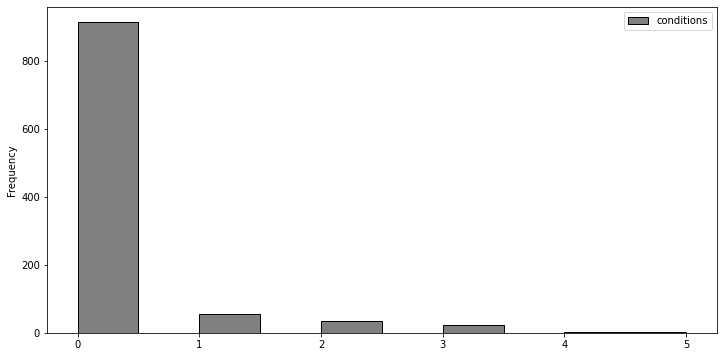

In [ ]:
moddf.plot.hist(figsize=(12,6), facecolor='grey',edgecolor='black', bins = 10)



As is to be seen above, the bulk of the patients do not have any accompanying conditions. Now, the very same histogram after dropping the ones with 0

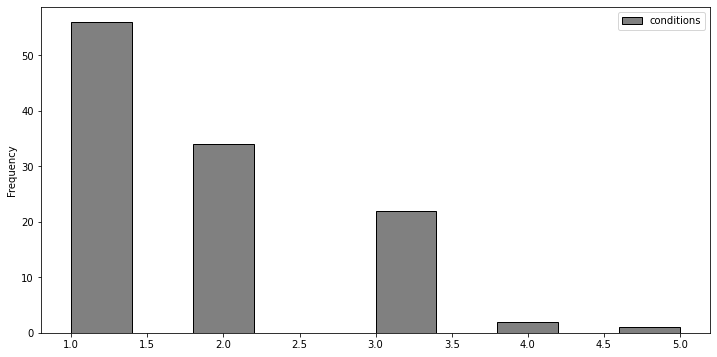

In [ ]:
moddf_2 = moddf[moddf['conditions'] > 0]
moddf_2.plot.hist(figsize=(12,6), facecolor='grey',edgecolor='black')

grouping the people according to race and ethnicity

In [ ]:
rac_eth = df_patients.groupby(['RACE', 'ETHNICITY'])['Id'].count().reset_index(name = 'count')

rac_eth

,RACE,ETHNICITY,count
0,asian,hispanic,4
1,asian,nonhispanic,67
2,black,hispanic,19
3,black,nonhispanic,71
4,native,hispanic,1
5,native,nonhispanic,5
6,other,nonhispanic,1
7,white,hispanic,93
8,white,nonhispanic,767


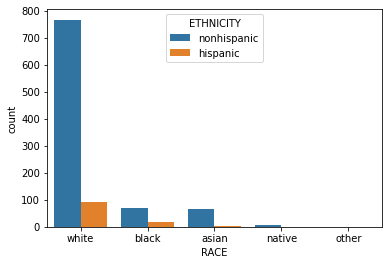

In [ ]:
# distribution of the above attributes
sns.countplot(data = df_patients, x = 'RACE', hue = 'ETHNICITY')

In [ ]:
# mean conditions count when grouped by race and ethnicity

meancon = pat_con[['Id', 'RACE', 'ETHNICITY', 'CODE_CONDITION']]

#add a column to give sum of conditions per person
meancon["con_count"] = meancon.groupby('Id')["CODE_CONDITION"].transform("count")

#drop the code_condition column
meancon = meancon.drop(columns = 'CODE_CONDITION')

#drop the duplicates
meancon = meancon.drop_duplicates()

#add a new column with the mean of conditions a patient in every group has
meancon["mean_con"] = meancon.groupby(['RACE', 'ETHNICITY'])["con_count"].transform("mean")

#drop the Id and con_count columns
meancon = meancon.drop(columns=['con_count', 'Id'])

#drop the duplicates so that only the division in race and ethnicity remains, then sort
meancon = meancon.drop_duplicates()
meancon = meancon.sort_values(by = ['RACE', 'ETHNICITY'])
meancon


<ipython-input-62-6148ef73f133>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meancon["con_count"] = meancon.groupby('Id')["CODE_CONDITION"].transform("count")


,RACE,ETHNICITY,mean_con
31,asian,hispanic,0.000000
8,asian,nonhispanic,0.283582
46,black,hispanic,0.000000
5,black,nonhispanic,0.239437
1043,native,hispanic,0.000000
278,native,nonhispanic,0.800000
964,other,nonhispanic,0.000000
2,white,hispanic,0.193548
0,white,nonhispanic,0.189048


In [ ]:
# it is clear, that the groups with 0 mean conditions were simply too small and none was recorder
# those need to be dropped

meancon = meancon[(meancon.mean_con > 0)]
meancon

,RACE,ETHNICITY,mean_con
8,asian,nonhispanic,0.283582
5,black,nonhispanic,0.239437
278,native,nonhispanic,0.800000
2,white,hispanic,0.193548
0,white,nonhispanic,0.189048


In [ ]:
# now repeat the process for the medications to see what is the average number of
# meds that every group takes

In [ ]:
pat_med = pd.DataFrame.merge(df_patients, df_medications, left_on="Id", right_on="PATIENT", how="left")
pat_med.drop("PATIENT", axis=1, inplace=True)

In [ ]:
meanmed = pat_med[['Id', 'RACE', 'ETHNICITY', 'CODE_MEDICATION']]

#add a column to give sum of conditions per person
meanmed["med_count"] = meanmed.groupby('Id')["CODE_MEDICATION"].transform("count")

#drop the code_condition column
meanmed = meanmed.drop(columns = 'CODE_MEDICATION')

#drop the duplicates
meanmed = meanmed.drop_duplicates()

#add a new column with the mean of conditions a patient in every group has
meanmed["mean_med"] = meanmed.groupby(['RACE', 'ETHNICITY'])["med_count"].transform("mean")

#drop the Id and con_count columns
meanmed = meanmed.drop(columns=['med_count', 'Id'])

#drop the duplicates so that only the division in race and ethnicity remains, then sort
meanmed = meanmed.drop_duplicates()
meanmed = meanmed.sort_values(by = ['RACE', 'ETHNICITY'])
meanmed

<ipython-input-66-f7c3da4ed176>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meanmed["med_count"] = meanmed.groupby('Id')["CODE_MEDICATION"].transform("count")


,RACE,ETHNICITY,mean_med
34,asian,hispanic,0.000000
8,asian,nonhispanic,0.522388
50,black,hispanic,0.000000
5,black,nonhispanic,0.197183
1181,native,hispanic,0.000000
335,native,nonhispanic,1.000000
1093,other,nonhispanic,0.000000
2,white,hispanic,0.322581
0,white,nonhispanic,0.307692


In [ ]:
# it is clear, that the groups with 0 mean conditions were simply too small and none was recorder
# the antive nonhispanic group is also an outlier, which can also be attributed to a too small
#patient group
# those need to be dropped

meanmed = meanmed[(meanmed.mean_med > 0) & (meanmed.mean_med != 1)]

meanmed

,RACE,ETHNICITY,mean_med
8,asian,nonhispanic,0.522388
5,black,nonhispanic,0.197183
2,white,hispanic,0.322581
0,white,nonhispanic,0.307692


# Plotting the data

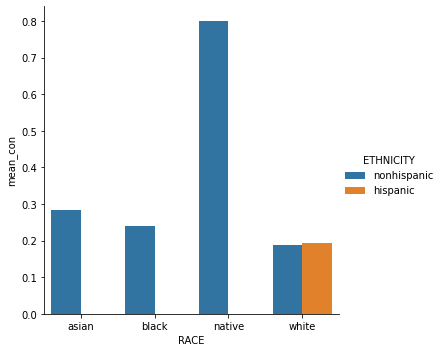

In [ ]:
# mean mconditions number plotted against race and ethnicity
sns.catplot(data = meancon, x = 'RACE', y='mean_con', hue = 'ETHNICITY', kind='bar')

In [ ]:
# from the above graph it is clear, that because the hispanic ethnicity is only largely enough
# represented in the white race, it cannot be used to answer the question on whether it influences
# the morbidity
# the 'native' race hat the highest average number of conditions, most possibly it's due to 
# underrepresentation of this group in the dataset

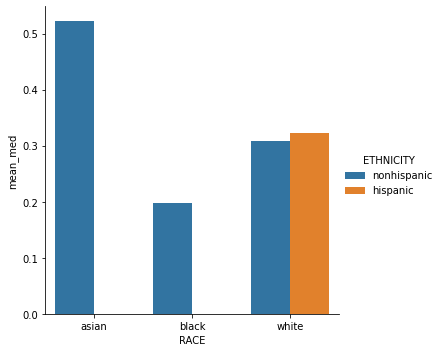

In [ ]:
sns.catplot(data = meanmed, x = 'RACE', y='mean_med', hue = 'ETHNICITY', kind='bar')

### Countplot

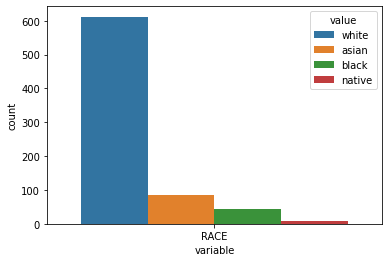

In [ ]:
# distribution of RACE attribute
sns.countplot(x="variable", hue= "value", data=pd.melt(df[["RACE"]]))

##  Multivariate Analysis: Analyzing Relationships Between Variables

Correlation matrices and scatterplots are useful for exploring the relationship between two variables.


### Correlation Matrix


In [ ]:
# create patients table with medication and condition count
con_count_df = df_conditions[['PATIENT', 'CODE_CONDITION']]

#add a column to give sum of conditions per person
con_count_df["con_count"] = con_count_df.groupby('PATIENT')["CODE_CONDITION"].transform("count")
con_count_df.drop("CODE_CONDITION", axis=1, inplace = True)
con_count_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
#con_count_df

# now the same for medications
med_count_df = df_medications[['PATIENT', 'CODE_MEDICATION']]

#add a column to give sum of conditions per person
med_count_df["med_count"] = med_count_df.groupby('PATIENT')["CODE_MEDICATION"].transform("count")
med_count_df.drop("CODE_MEDICATION", axis=1, inplace = True)
med_count_df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
#med_count_df

new_df = pd.DataFrame.merge(df_patients, con_count_df, left_on="Id", right_on="PATIENT", how="left")
new_df.drop("PATIENT", axis=1, inplace=True)

#set NaN values to 0
new_df["con_count"].fillna(value=0, inplace=True)


new_df = pd.DataFrame.merge(new_df, med_count_df, left_on="Id", right_on="PATIENT", how="left")
new_df.drop("PATIENT", axis=1, inplace=True)
new_df["med_count"].fillna(value=0, inplace=True)


new_df.head(10)

<ipython-input-77-aa634cd82d77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_count_df["con_count"] = con_count_df.groupby('PATIENT')["CODE_CONDITION"].transform("count")
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

,Id,AGE,ETHNICITY,RACE,con_count,med_count
0,5e96bd7f-bdc3-7787-110f-ba2dfb89948b,41,nonhispanic,white,0.0,0.0
1,19a257c0-1425-cb43-c92b-60be60a62e4b,11,nonhispanic,white,0.0,0.0
2,e864c897-cc30-45e3-0950-8503ed51d86c,26,hispanic,white,0.0,0.0
3,1f162789-128f-2fa6-3c99-c4a517a7e694,29,nonhispanic,white,0.0,0.0
4,0508d723-6462-c769-7050-e9eff1f61ec7,52,nonhispanic,white,0.0,0.0
5,035a1274-294a-431d-f4a8-0f29e85ecf99,31,nonhispanic,black,0.0,0.0
6,c3b4970d-06c7-3c22-18a3-4e9353f35baf,65,nonhispanic,white,0.0,0.0
7,3acfeeda-c00b-bdec-6e5d-42237d5b6eae,55,nonhispanic,white,0.0,0.0
8,3a6b7336-da64-2bfd-f1be-9f403a0fb71c,7,nonhispanic,asian,0.0,0.0
9,bc30d56e-30e3-23ce-5233-e0d6aa68c262,7,hispanic,white,0.0,0.0


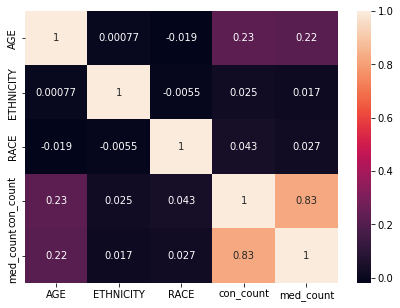

In [ ]:
cordf = new_df
cordf.RACE.replace(["white", "black", "asian", "native", "other"], [1, 2, 3, 4, 5], inplace=True)
cordf.ETHNICITY.replace(['hispanic', 'nonhispanic'], [0, 1], inplace = True)

# Generating the correlating matrix
corr = cordf.corr()
plt.figure(figsize=(7, 5))
# Generating the correlation heat-map
sns.heatmap(corr, annot=True)

### Scatterplot


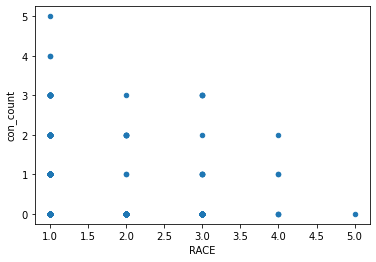

In [ ]:
new_df.plot(kind='scatter', y='con_count', x='RACE')


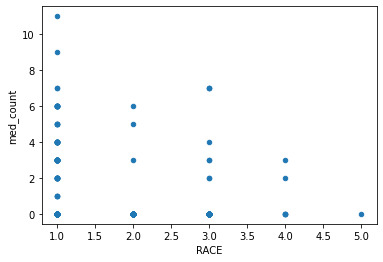

In [ ]:
new_df.plot(kind='scatter', y='med_count', x='RACE')

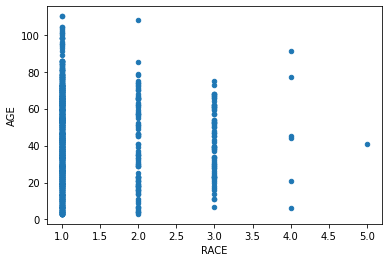

In [ ]:
new_df.plot(kind='scatter', y='AGE', x='RACE')


# Modelling Data

We can use classification methods to create a model and find the relation between some independent variables such as age, race, gender, code_condition and target attribute (code_procedure).

This section includes:
* Data preparation:    
    * shuffling dataset
    * converting categorical features to numerical (if necessary)
    * spliting data to features and target variables
    * spliting data to train, validation and test data, 70% for train, 15% for test and validation.
* Training and parameter tuning
    * RandomForest
    * XGBoost
* Evaluation
* Prediction



In [ ]:
# import python packages for ML models
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import  GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## Data Preparation

In [ ]:
prep_df = new_df

In [ ]:
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1027
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1028 non-null   object 
 1   AGE        1028 non-null   int64  
 2   ETHNICITY  1028 non-null   int64  
 3   RACE       1028 non-null   int64  
 4   con_count  1028 non-null   float64
 5   med_count  1028 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 56.2+ KB


In [ ]:
# shuffle data, frac=1 means 100 percent of dataset will be shuffled
prep_df = prep_df.sample(frac=1)

In [ ]:
prep_df.shape

(1028, 6)

In [ ]:
# split data to train, test and validation dataframes 
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# test df is now 15% of the entire data set
df_train, df_test = train_test_split(prep_df, test_size=test_ratio, random_state=0)
df_train.shape, df_test.shape

((873, 6), (155, 6))

In [ ]:
# split data to features and target dataframes 
X = df_train[["RACE", 'ETHNICITY']]
y = df_train["med_count"]

# split data to train and validation dataframes 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=validation_ratio, random_state=0)

X_train.shape, X_val.shape

((742, 2), (131, 2))

## RandomForest Model

### Training

In [ ]:
# RandomForest Classifier
rf = RandomForestClassifier(n_estimators=8, max_depth=6, random_state=0)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=8, random_state=0)

### Ranking the Features

Feature ranking:
1. feature 0 (0.758335)
2. feature 1 (0.241665)


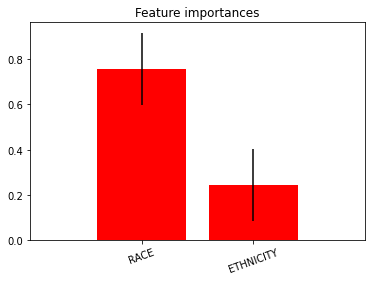

In [ ]:
# feature importance
importances = rf.feature_importances_
features = X.columns

std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=20)
plt.xlim([-1, X.shape[1]])
plt.show()

### Model Evaluation


In [ ]:
# predicted value for train and test dataset
pred_train = rf.predict(X_train)
pred_val = rf.predict(X_val)

In [ ]:
# calculate Accuracy score for train and validation data
acc_train = accuracy_score(y_train, pred_train)
acc_val = accuracy_score(y_val, pred_val)

acc_train, acc_val

(0.9150943396226415, 0.9389312977099237)

## Xgboost Model (**Grid Search**)

### Training

In [ ]:
# Create the parameter grid search
param_grid = {
    'learning_rate': [0.05, 0.5], #so called `eta` value    
    'max_depth': [2, 5, 10, 15],
    'colsample_bytree': [0.4],
    # "objective" :["reg:tweedie"],
    'gamma':[0],               
    'min_child_weight':[1.5],
    'n_estimators' : [5, 10],                                                                    
    'reg_alpha': [0.75],
    'reg_lambda' : [0.45],
    'subsample' : [0.6],
    'seed' : [42]
}
   
# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
grid_search_xgb = GridSearchCV(estimator = xgb, 
                               param_grid=param_grid,
                               cv=3,
                               n_jobs=-1,
                               verbose=2)

In [ ]:
# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4], 'gamma': [0],
                         'learning_rate': [0.05, 0.5],
                         'max_depth': [2, 5, 10, 15], 'min_child_weight': [1.5],
                         'n_estimators': [5, 10], 'reg_alpha': [0.75],
                         'reg_lambda': [0.45], 'seed': [42],
                         'subsample': [0.6]},
             verbose=2)

In [ ]:
# best parameters after grid search
grid_search_xgb.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0,
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 1.5,
 'n_estimators': 5,
 'reg_alpha': 0.75,
 'reg_lambda': 0.45,
 'seed': 42,
 'subsample': 0.6}

### Model Evaluation


In [ ]:
# Best model
best_grid_xgb = grid_search_xgb.best_estimator_

# Evaluating the Algorithm for train data
pred_train_xgb = best_grid_xgb.predict(X_train)
print('Accuracy for train data:', accuracy_score(y_train, pred_train_xgb))  

# Evaluating the Algorithm for test data
pred_test_xgb = best_grid_xgb.predict(X_val)
acc_xgb = round(accuracy_score(y_val, pred_test_xgb), 5)
print('Accuracy for test data:', acc_xgb)

Accuracy for train data: 0.9150943396226415
Accuracy for test data: 0.93893


## Prediction

In [ ]:
df_test.shape

(155, 6)

In [ ]:
df_test.columns

Index(['Id', 'AGE', 'ETHNICITY', 'RACE', 'con_count', 'med_count'], dtype='object')

In [ ]:
selected_columns = X.columns

In [ ]:

x_test = df_test[X.columns]
df_test["RF_prediction"] = rf.predict(x_test)
df_test["XGB_prediction"] = best_grid_xgb.predict(x_test)


In [ ]:
df_test.head(20)

,Id,AGE,ETHNICITY,RACE,con_count,med_count,RF_prediction,XGB_prediction
705,f4a60dc6-54b2-2552-d0f2-943fea151f56,36,1,2,2.0,0.0,0.0,0.0
310,3fae9e03-b2ff-685f-8ccd-0356b0c114d0,39,1,1,0.0,0.0,0.0,0.0
505,013703d7-19c8-9ce5-a87b-e002410133bb,55,1,1,0.0,0.0,0.0,0.0
257,9fc54fb1-a6d6-79d2-1790-662f0f8aeddf,34,1,1,0.0,0.0,0.0,0.0
405,2eb2b271-15d4-d708-4ed1-1554a29cbd6f,7,0,1,0.0,0.0,0.0,0.0
291,070fe611-baca-599d-1ec9-241a78f5082b,16,1,1,0.0,0.0,0.0,0.0
487,be8fedbf-72a7-63ed-d43c-16479e46679f,51,1,1,0.0,0.0,0.0,0.0
622,0d8b6704-6846-5c6a-4d90-43e4fefe31c4,64,1,1,0.0,0.0,0.0,0.0
955,f6f63835-1f7c-dd8f-5f9d-fa801fb19af5,30,1,1,0.0,0.0,0.0,0.0
1009,b71e0263-3c73-1883-15db-67fa06bfc4d1,46,1,1,0.0,0.0,0.0,0.0


#Exporting Results to an Excel File

In [ ]:
# df.to_excel("Procedure_prediction.xlsx", index=False, sheet_name="Prediction")